In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
df_train = pd.read_pickle('Pickles/df_train.pkl')
df_test = pd.read_pickle('Pickles/df_test.pkl')
df_val = pd.read_pickle('Pickles/df_val.pkl')

print("Train DataFrame shape:", df_train.shape)
print(df_train.head())

print("Test DataFrame shape:", df_test.shape)
print(df_test.head())

print("Validation DataFrame shape:", df_val.shape)
print(df_val.head())


Train DataFrame shape: (3087, 2)
                                               image label
0  [[[252, 217, 197], [252, 217, 197], [252, 217,...   CaS
1  [[[253, 216, 197], [252, 215, 196], [252, 215,...   CaS
2  [[[255, 255, 239], [254, 255, 238], [254, 255,...   CaS
3  [[[255, 255, 235], [255, 255, 235], [255, 255,...   CaS
4  [[[230, 194, 168], [230, 194, 168], [230, 194,...   CaS
Test DataFrame shape: (1028, 2)
                                               image label
0  [[[232, 197, 169], [232, 197, 169], [232, 197,...   CaS
1  [[[11, 13, 12], [11, 13, 12], [11, 13, 12], [1...   CaS
2  [[[193, 143, 120], [197, 147, 124], [201, 151,...   CaS
3  [[[243, 187, 162], [242, 186, 161], [240, 184,...   CaS
4  [[[100, 47, 31], [101, 48, 32], [101, 48, 32],...   CaS
Validation DataFrame shape: (1028, 2)
                                               image label
0  [[[255, 241, 225], [255, 241, 225], [255, 242,...   CaS
1  [[[205, 159, 136], [205, 159, 136], [204, 158,...   CaS
2  [[[24, 18

In [3]:
print("Type of first image in train set:", type(df_train.loc[0, 'image']))
print("Shape of first image:", np.array(df_train.loc[0, 'image']).shape)

Type of first image in train set: <class 'numpy.ndarray'>
Shape of first image: (256, 256, 3)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3087 non-null   object
 1   label   3087 non-null   object
dtypes: object(2)
memory usage: 48.4+ KB


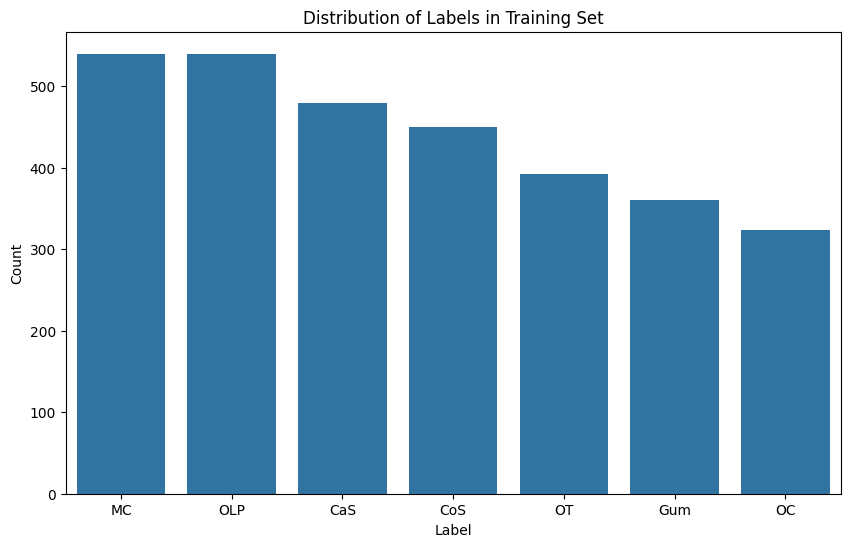

In [5]:
# Count plot
plt.figure(figsize=(10, 6))
order = df_train['label'].value_counts().index # To sort Descending
sns.countplot(data=df_train , x='label' , order=order)

plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

No bais found

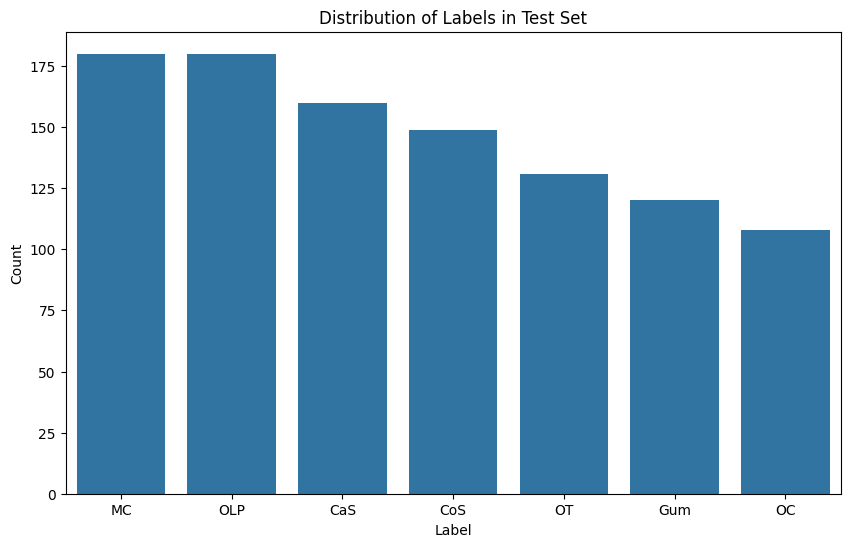

In [6]:
# Count plot
plt.figure(figsize=(10, 6))
order = df_train['label'].value_counts().index # To sort Descending
sns.countplot(data=df_test, x='label' , order=order)

plt.title('Distribution of Labels in Test Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

No bais found

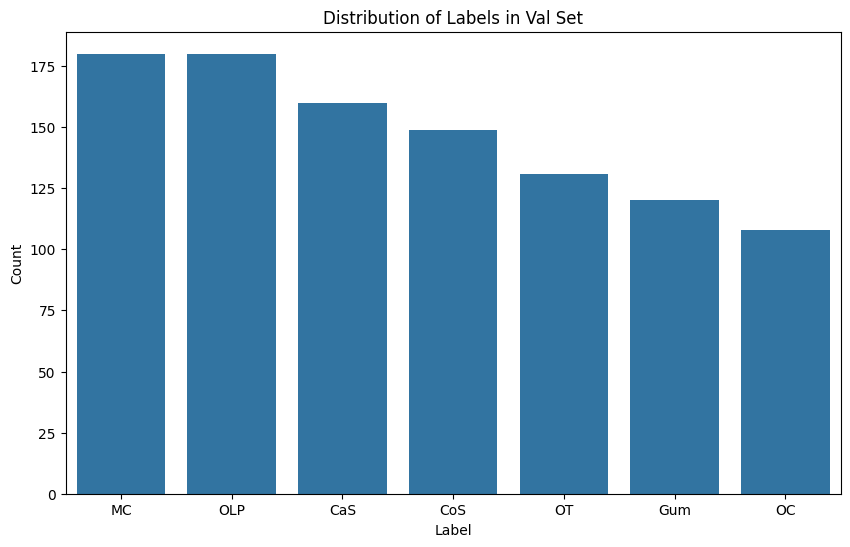

In [7]:
# Count plot
plt.figure(figsize=(10, 6))
order = df_train['label'].value_counts().index # To sort Descending
sns.countplot(data=df_val, x='label', order=order)

plt.title('Distribution of Labels in Val Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

No bais found

In [8]:
df_train.isnull().sum()

image    0
label    0
dtype: int64

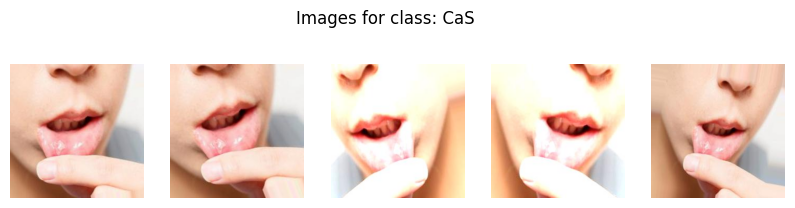

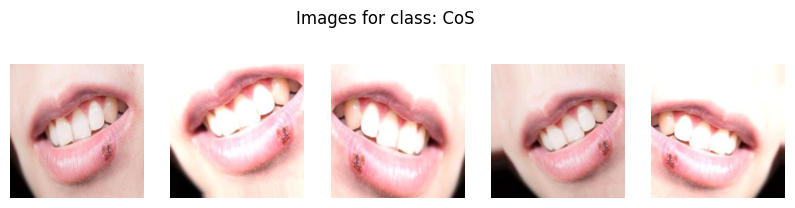

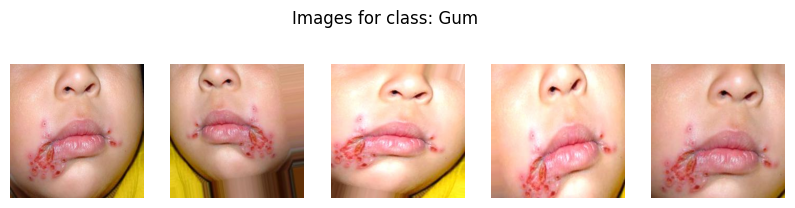

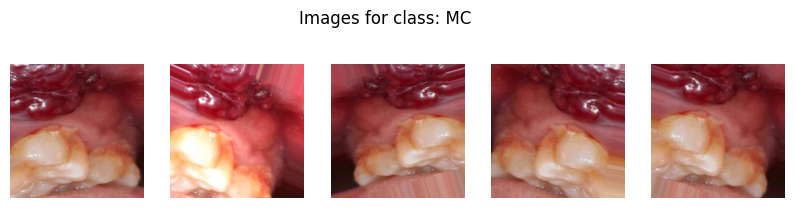

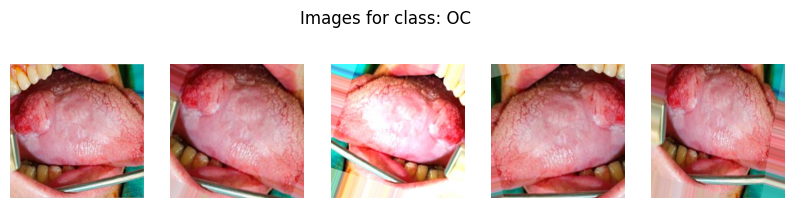

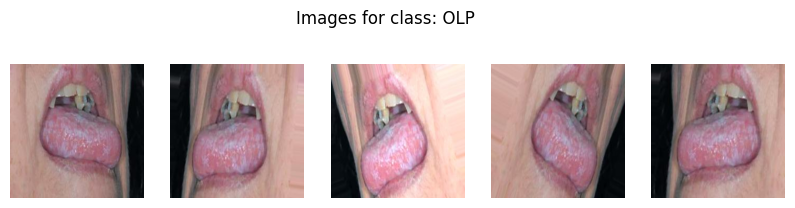

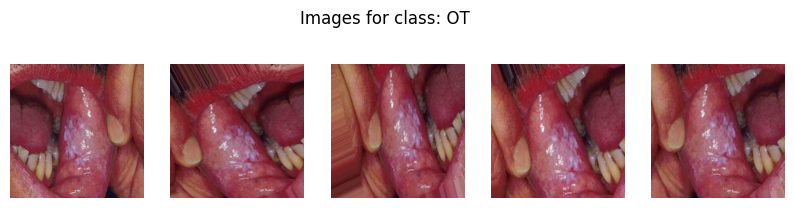

In [9]:
class_name = df_train['label'].unique()

for name in class_name:
    class_df = df_train[df_train['label'] == name]
    
    plt.figure(figsize=(10, 2.5))
    plt.suptitle(f'Images for class: {name}')
    
    for i in range(5):
        if i < len(class_df):
            plt.subplot(1, 5, i + 1)
            img = class_df.iloc[i]['image']
            plt.imshow(img)
            plt.axis('off')
    
    plt.show()
    

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


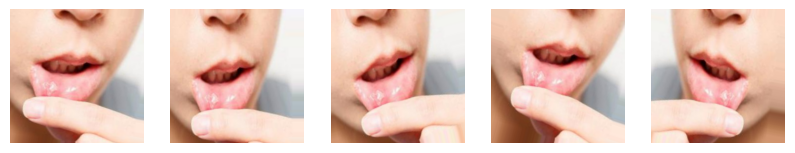

In [11]:
img_sample = df_train.loc[0, 'image']
img_sample = np.expand_dims(img_sample, axis=0)

aug_iter = datagen.flow(img_sample, batch_size=1)

plt.figure(figsize=(10,3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    batch = next(aug_iter)
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.axis('off')

plt.show()